In [1]:
import os
# os.chdir("dlmi-project")
import pickle as pkl
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import itertools

In [2]:
save_perf = pkl.load(open(os.path.join("interrater", "models",str("0.005_20_1_4_entropy"+'.pkl')), 'rb'))

In [3]:
INTERRATER_FOLDER = os.path.join("data", "interrater_data")
dict_interrater = dict_interrater = pkl.load(open(os.path.join(INTERRATER_FOLDER,'dict_interrater.pkl'), 'rb'))

## Check interrater metrics values for ARIA, STARE and CHASE datasets

In [4]:
for metr in ["IoU","entropy"]:
    for DB in ["aria","stare","chasedb1"]:
        print(metr)
        print(DB)
        print(np.min(dict_interrater[DB][metr]))
        print(np.max(dict_interrater[DB][metr]))

IoU
aria
0.25912435887906043
0.8941446134611377
IoU
stare
0.5093241795695783
0.6619964361832221
IoU
chasedb1
0.5862008241467968
0.7047850384200165
entropy
aria
-14889.148012017904
-1056.3563031733565
entropy
stare
-11028.66478988929
-3352.7529123684553
entropy
chasedb1
-12460.706864926136
-6444.535911256091


## Save model performances 

In [47]:
perf_df_tot = pd.read_csv(os.path.join("interrater", "models","perf_df.csv"))
epochs = save_perf["config"]["epochs"]
perf_df = {}
perf_df["index"] = len(perf_df_tot)
for k in list(save_perf["config"].keys()):
    perf_df[k] = save_perf["config"][k]
perf_df["train_loss"] = save_perf["train_loss"][epochs-1]
perf_df["val_loss"] = save_perf["train_loss"][epochs-1]
perf_df["train_mae"] = save_perf["train_acc"][epochs-1]["mae"] 
perf_df["train_max_error"] = save_perf["train_acc"][epochs-1]["max_error"] 
perf_df["val_mae"] = save_perf["val_acc"][epochs-1]["mae"] 
perf_df["val_max_error"] = save_perf["val_acc"][epochs-1]["max_error"] 
perf_df["time"]=datetime.datetime.now()
perf_df = pd.DataFrame(perf_df, index=[len(perf_df_tot)])
perf_df_tot = pd.concat([perf_df_tot,perf_df])
perf_df_tot.to_csv(os.path.join("interrater", "models","perf_df.csv"))

## Write detailed tables with train-validation-test splits

In [6]:
np.random.seed(0)
ARIA_SHUFFLE = np.random.choice(range(143), size=143, replace=False)
STARE_SHUFFLE = np.random.choice(range(21), size=21, replace=False)

STARE_SUBSET_TRAIN = STARE_SHUFFLE[:15]
STARE_SUBSET_VAL = STARE_SHUFFLE[15:21]

# initial config
ARIA_SUBSET_TRAIN = ARIA_SHUFFLE[:107]
ARIA_SUBSET_VAL = ARIA_SHUFFLE[107:127]
ARIA_SUBSET_TEST = ARIA_SHUFFLE[127:143]

In [7]:
aria_df=pd.read_csv("C:/Users/Philo/Documents/3A -- MVA/DL for medical imaging/retine/dlmi-project/data/aria/aria_df.csv")
aria_df["train"] = [(i in ARIA_SUBSET_TRAIN)*1 for i in range(len(aria_df))]
aria_df["val"] = [(i in ARIA_SUBSET_VAL)*1 for i in range(len(aria_df))]
aria_df["test"] = [(i in ARIA_SUBSET_TEST)*1 for i in range(len(aria_df))]
# aria_df.to_csv("C:/Users/Philo/Documents/3A -- MVA/DL for medical imaging/retine/dlmi-project/data/aria/aria_df.csv",index=False)

In [15]:
stare_df=pd.read_csv("data/stare/stare_df.csv")
stare_df["train"] = [(i in STARE_SUBSET_TRAIN)*1 for i in range(len(stare_df))]
stare_df["val"] = [(i in STARE_SUBSET_VAL)*1 for i in range(len(stare_df))]
stare_df["test"] = [0 for i in range(len(stare_df))]
stare_df.to_csv("data/stare/stare_df.csv",index=False)

## Plot interrater metrics along patient's health conditions 

#### STARE dataset

In [153]:
dict_interrater["stare"].to_csv("data/stare/stare_df_detailed.csv",index=False)
labels = stare_df["description"].unique()

In [9]:
def plot_hist_metric_disease_stare(metric):
    plt.hist(stare_df2[metric].loc[stare_df['description']!="Normal"],alpha=0.3, label = "sick")
    plt.hist(stare_df2[metric].loc[stare_df['description']=="Normal"],alpha=0.3, label = "healthy")
    plt.title(metric+" for healthy and sick subjects from STARE")
    plt.ylabel("Number of images")
    plt.xlabel(metric)
    plt.legend()
    plt.show()

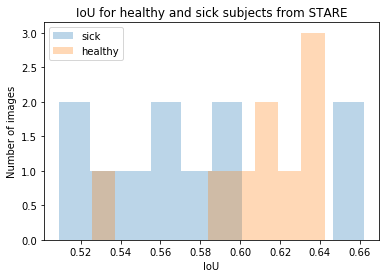

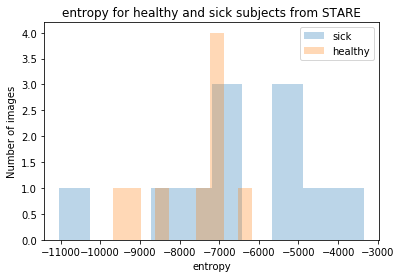

In [16]:
plot_hist_metric_disease_stare("IoU")
plot_hist_metric_disease_stare("entropy")

#### ARIA dataset

In [5]:
def plot_hist_metric_disease_aria(metric):
    plt.hist(aria_df[metric].loc[aria_df["AMD"]==1],alpha=0.3, label = "AMD")
    plt.hist(aria_df[metric].loc[aria_df["healthy"]==1],alpha=0.3, label = "healthy")
    plt.hist(aria_df[metric].loc[aria_df["diabetic"]==1],alpha=0.3, label = "diabetic")
    plt.title(metric+" for healthy, diabetic and AMD subjects from ARIA")
    plt.ylabel("Number of images")
    plt.xlabel(metric)
    plt.legend()
    plt.show()

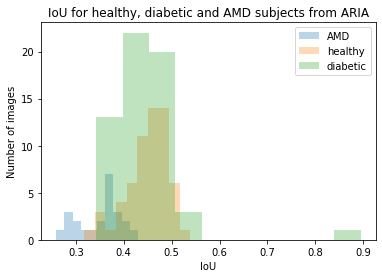

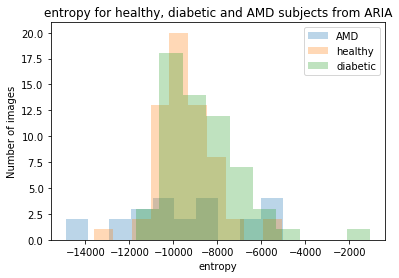

In [8]:
plot_hist_metric_disease_aria("IoU")
plot_hist_metric_disease_aria("entropy")

## Class imbalance in the different datasets

#### ARIA dataset

In [75]:
annot1 = []
annot2 =[]
for img_path in os.listdir(os.path.join("data","aria","annotation 1")):
    if img_path != "desktop.ini": 
        img = plt.imread(os.path.join("data","aria","annotation 1",img_path))
        annot1.append(np.sum(img)/(img.shape[0]*img.shape[1]))
for img_path in os.listdir(os.path.join("data","aria","annotation 2")):
    if img_path != "desktop.ini": 
        img = plt.imread(os.path.join("data","aria","annotation 2",img_path))
        annot2.append(np.sum(img)/(img.shape[0]*img.shape[1]))
        
print(np.min(annot1))
print(np.max(annot1))
print(np.mean(annot1))
print(np.median(annot1))
print(np.min(annot2))
print(np.max(annot2))
print(np.mean(annot2))
print(np.median(annot2))

9.81625027126736
35.13017442491319
20.715069094768797
20.889146592881943
6.5679931640625
30.50133599175347
18.318084740509054
18.59375


#### DRIVE dataset

In [28]:
annot = []
for img_path in os.listdir(os.path.join("data","drive","training", "labels")):
    if img_path != "desktop.ini": 
        img = plt.imread(os.path.join("data","drive","training", "labels",img_path))
        annot.append(np.sum(img)/(img.shape[0]*img.shape[1]))
        
print(np.min(annot))
print(np.max(annot))
print(np.mean(annot))
print(np.median(annot))

15.377591223178568
29.54417202085101
22.010520214571464
21.957775184870894


#### STARE dataset

In [24]:
annot1 = []
annot2 =[]
for img_path in os.listdir(os.path.join("data","stare","annotation 1")):
    if img_path != "desktop.ini": 
        img = plt.imread(os.path.join("data","stare","annotation 1",img_path))
        annot1.append(np.sum(img)/(img.shape[0]*img.shape[1]))
for img_path in os.listdir(os.path.join("data","stare","annotation 2")):
    if img_path != "desktop.ini": 
        img = plt.imread(os.path.join("data","stare","annotation 2",img_path))
        annot2.append(np.sum(img)/(img.shape[0]*img.shape[1]))
        
print(np.min(annot1))
print(np.max(annot1))
print(np.mean(annot1))
print(np.median(annot1))
print(np.min(annot2))
print(np.max(annot2))
print(np.mean(annot2))
print(np.median(annot2))

0.0430814639905549
0.1021086186540732
0.07603931523022432
0.07799409681227863
0.05552538370720189
0.1528099173553719
0.1088650531286895
0.11523848878394333


## Check train-validation-test split along patient's condition in ARIA

In [42]:
print(np.sum(aria_df["train"].loc[aria_df["healthy"]==1])/107)
print(np.sum(aria_df["train"].loc[aria_df["AMD"]==1])/107)
print(np.sum(aria_df["train"].loc[aria_df["diabetic"]==1])/107)

0.40186915887850466
0.16822429906542055
0.42990654205607476


In [49]:
print(np.sum(aria_df["test"].loc[aria_df["healthy"]==1])/16)
print(np.sum(aria_df["test"].loc[aria_df["AMD"]==1])/16)
print(np.sum(aria_df["test"].loc[aria_df["diabetic"]==1])/16)

0.5
0.125
0.375


In [45]:
print(np.sum(aria_df["val"].loc[aria_df["healthy"]==1])/20)
print(np.sum(aria_df["val"].loc[aria_df["AMD"]==1])/20)
print(np.sum(aria_df["val"].loc[aria_df["diabetic"]==1])/20)

0.5
0.15
0.35


In [47]:
diag_list = ["healthy","AMD","diabetic"]
aria_df["diagnose"]=""
aria_df["diagnose_digit"]=""
for i in range(len(aria_df)):
    for diag in range(len(diag_list)):
        if aria_df[diag_list[diag]].iloc[i]==1 :
            aria_df["diagnose"].iloc[i]=diag_list[diag]
            aria_df["diagnose_digit"].iloc[i]=diag

C:\Users\Philo\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


## Plot model's predictions VS targes on the ARIA dataset

0.005_100_1_2_IoU_norm_40_False.pkl


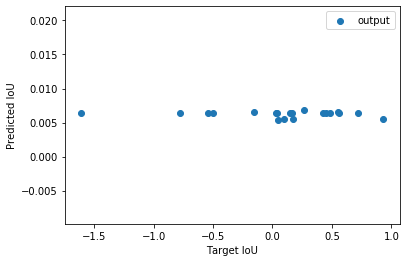

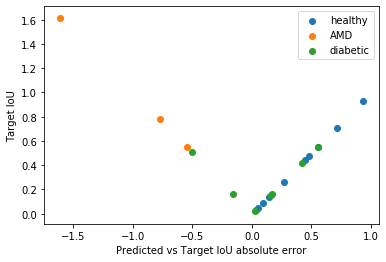

score 0.029364142141802163
coef -237.24501
intercept 1.5567722 

0.005_100_1_8_IoU_norm_80_True.pkl


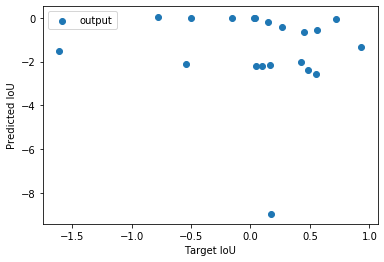

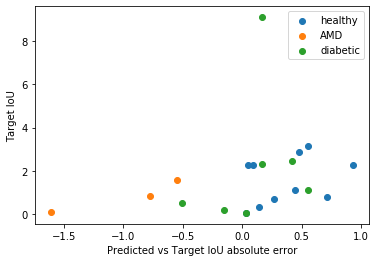

score 0.007828072184381307
coef -0.025449766
intercept 0.03677448 

0.005_20_1_4_entropy.pkl


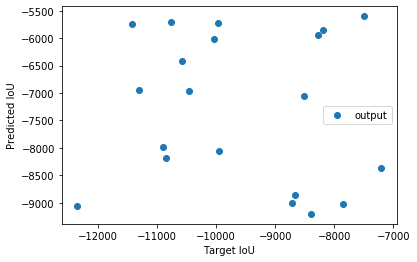

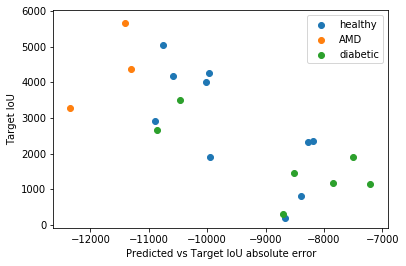

score 0.008874509595559688
coef -0.10293594
intercept -10343.634 

0.005_20_1_4_entropy_norm.pkl


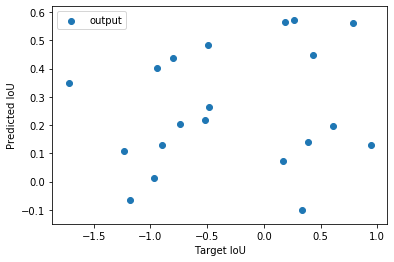

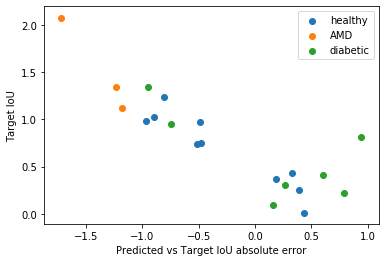

score 0.029847660747811533
coef 0.63228
intercept -0.45538253 

0.005_20_1_4_IoU_norm.pkl


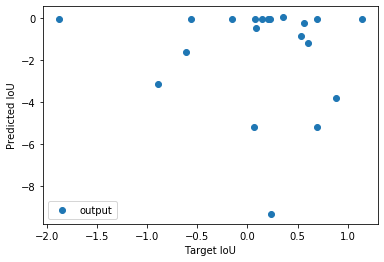

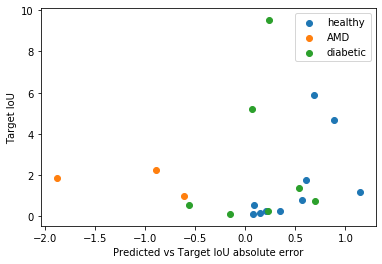

score 0.009649633181303852
coef -0.026964828
intercept 0.07692348 

0.005_23_1_0_IoU_norm_80_False.pkl


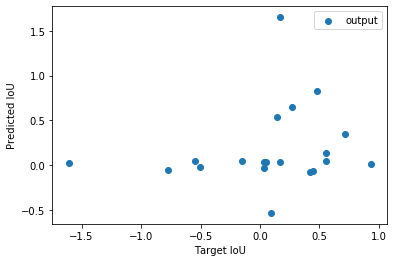

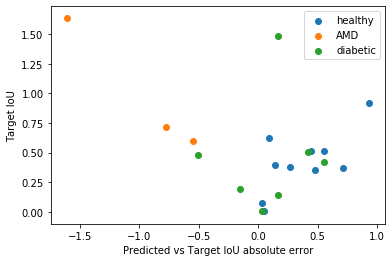

score 0.03125180238729963
coef 0.22650747
intercept 0.03286941 

0.005_23_1_0_IoU_norm_80_True.pkl


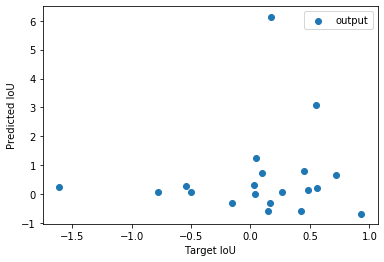

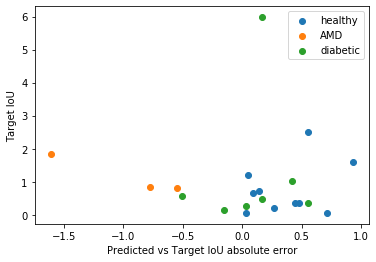

score 0.007550915415755144
coef 0.03271494
intercept 0.055116728 

0.005_23_1_10_IoU_norm_80_False.pkl


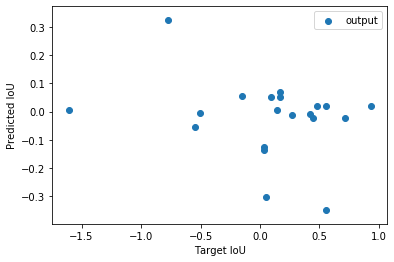

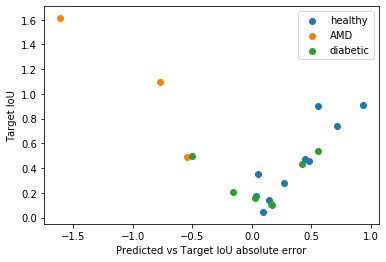

score 0.0665204045894845
coef -1.0879536
intercept 0.05127663 

0.005_23_1_20_IoU_norm_80_False.pkl


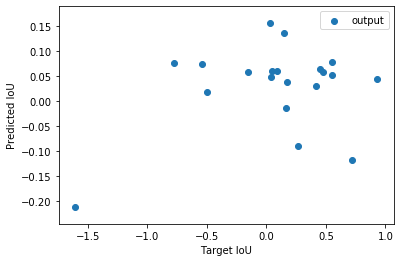

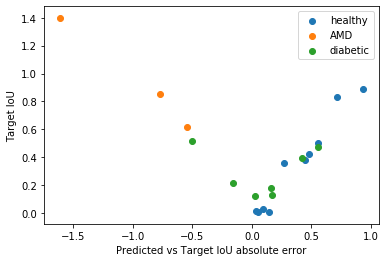

score 0.09640670845822907
coef 2.1348522
intercept 0.00726559 

0.005_23_1_2_IoU_norm_80_False.pkl


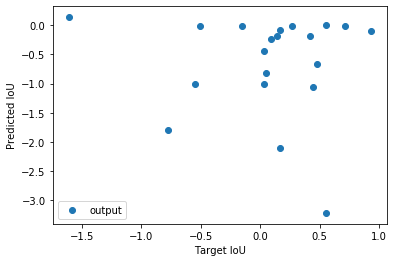

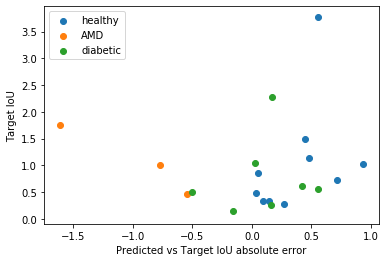

score 0.0037268553116613923
coef -0.04074961
intercept 0.04801278 

0.005_23_1_2_IoU_norm_80_True.pkl


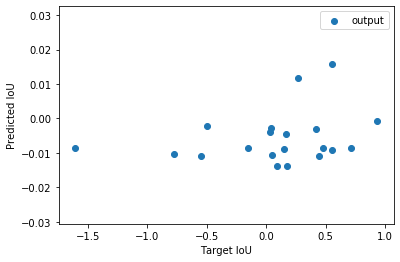

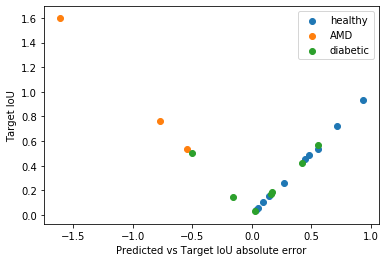

score 0.06758942727121253
coef 19.684984
intercept 0.18424465 

0.005_23_1_40_IoU_norm_80_False.pkl


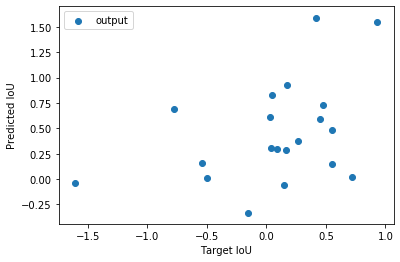

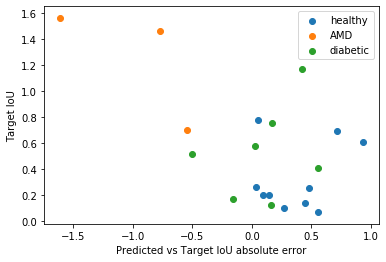

score 0.17240485794026028
coef 0.48114195
intercept -0.1467165 

0.005_23_1_4_IoU_norm_160.pkl


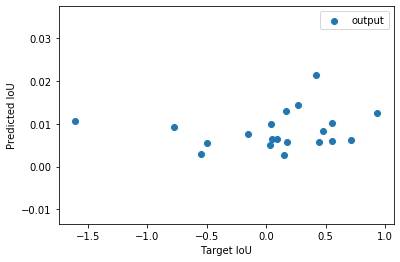

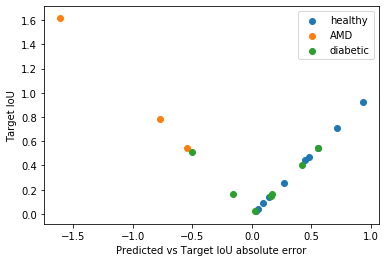

score 0.02056529640149829
coef 18.962704
intercept -0.08746014 

0.005_23_1_4_IoU_norm_2.pkl


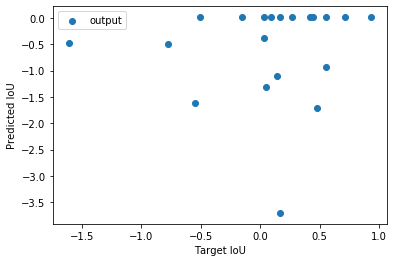

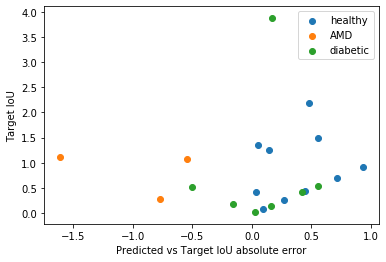

score 0.004985268912471974
coef 0.0433561
intercept 0.09907457 

0.005_23_1_4_IoU_norm_4.pkl


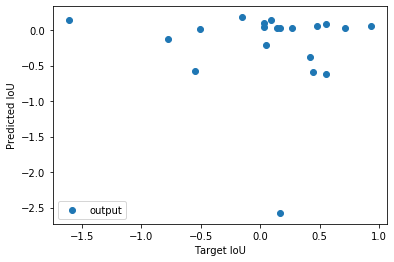

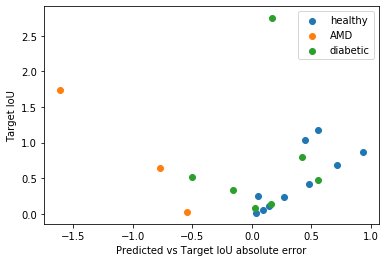

score 0.006904461295422327
coef -0.07864356
intercept 0.057849657 

0.005_23_1_4_IoU_norm_40.pkl


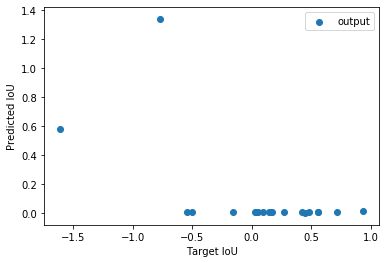

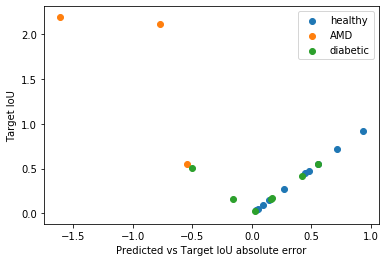

score 0.35550685089773426
coef -1.0851414
intercept 0.17985839 

0.005_23_1_4_IoU_norm_80_False.pkl


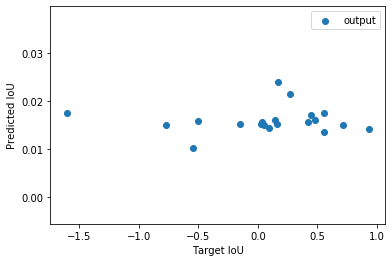

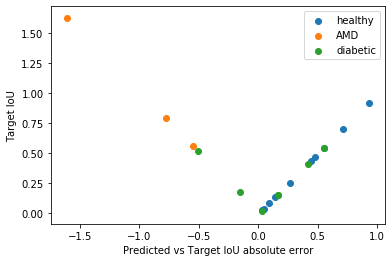

score 0.0017627264040173118
coef 8.681186
intercept -0.064806245 

0.005_23_1_4_IoU_norm_80_True.pkl


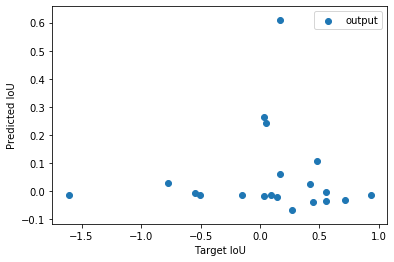

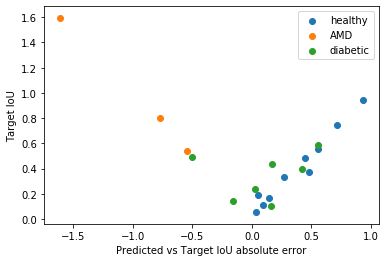

score 0.00039942408365156723
coef 0.07389975
intercept 0.07013873 

0.005_23_1_6_IoU_norm_80_False.pkl


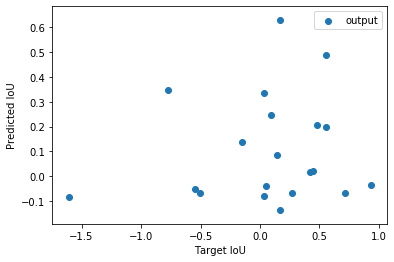

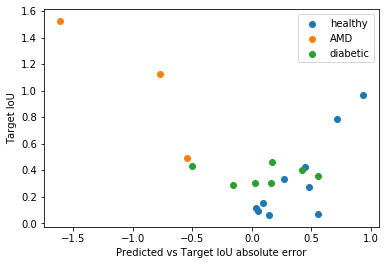

score 0.01333943365422463
coef 0.31269002
intercept 0.041611377 

0.005_23_1_6_IoU_norm_80_True.pkl


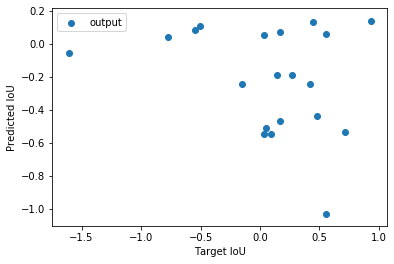

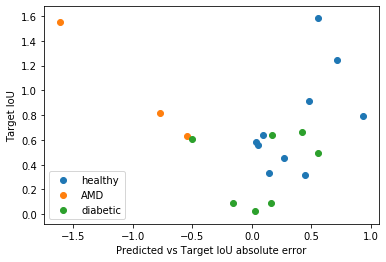

score 0.07383733466771603
coef -0.49225947
intercept -0.03191322 

0.005_23_1_80_IoU_norm_80_False.pkl


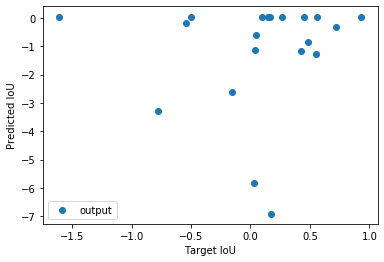

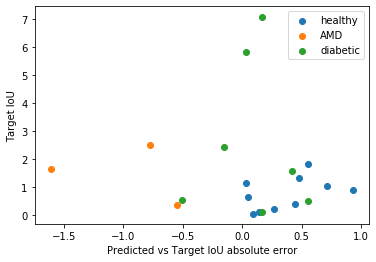

score 0.004954189393518771
coef 0.020423101
intercept 0.09831555 

0.005_23_1_8_IoU_norm_80_False.pkl


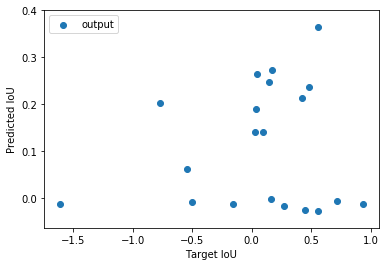

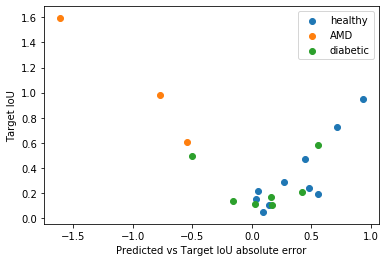

score 0.01072347955382813
coef 0.46320668
intercept 0.022960108 

0.005_23_1_8_IoU_norm_80_True.pkl


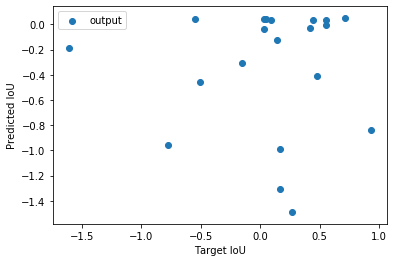

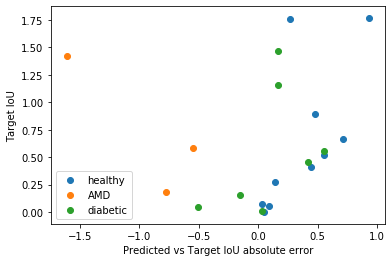

score 0.0002780628371763516
coef 0.019461408
intercept 0.08067715 

0.005_40_1_4_IoU_norm.pkl


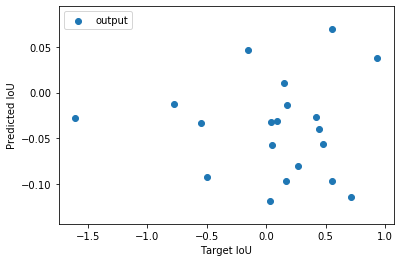

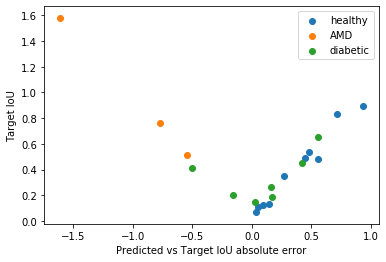

score 1.2724113964357464e-05
coef 0.03914214
intercept 0.075510055 



In [91]:
dict_model_selection={"file":[],
                      "time":[],
                      "target":[],
                      "output":[],
                      "score":[],
                      "coef":[],
                      "intercept":[]}

for file in os.listdir(os.path.join("interrater","figures")):
    if ".pkl" in file :
        print(file)
        dict_model_selection["file"].append(file)
        time = os.path.getmtime(os.path.join("interrater","figures",file))
        dict_model_selection["time"].append(time)
        p= pkl.load(open(os.path.join("interrater","figures",file), 'rb'))
        target = np.array(p["target"])
        output = np.array(p["output"])
        dict_model_selection["output"].append(output)
        dict_model_selection["target"].append(target)
        plt.scatter(target[np.argsort(target)],output[np.argsort(target)],label="output")
        plt.xlabel("Target IoU")
        plt.ylabel("Predicted IoU")
        plt.legend()
        plt.savefig(os.path.join("interrater","figures",file[:-4]+"_comp_plot.png"))
        plt.show()
        
        for diag in ["healthy","AMD","diabetic"]:
            sub_list = [label[i]==diag for i in range(len(label))]
            x=target[sub_list][np.argsort(target[sub_list])]
            y=np.abs(target-output)[sub_list][np.argsort(target[sub_list])]
            plt.scatter(x,y,label=diag)
            plt.xlabel("Predicted vs Target IoU absolute error")
            plt.ylabel("Target IoU")
        plt.legend()
        plt.savefig(os.path.join("interrater","figures",file[:-4]+"_comp_plot_dis.png"))
        plt.show()
        reg = LinearRegression(fit_intercept = True).fit(output.reshape(-1, 1), target)
        score = reg.score(output.reshape(-1, 1), target)
        print("score",score)
        coef = reg.coef_[0]
        print("coef",coef)
        intercept = reg.intercept_
        print("intercept",intercept,"\n")
        dict_model_selection["score"].append(score)
        dict_model_selection["coef"].append(coef)
        dict_model_selection["intercept"].append(intercept)

In [114]:
# Sort by coefficient

for i in np.argsort(-np.array(dict_model_selection["coef"]))[:5]:
    print(i)
    print(dict_model_selection["coef"][i])
    print(dict_model_selection["score"][i])
    print(dict_model_selection["intercept"][i])
    print(dict_model_selection["file"][i])

10
19.684984
0.06758942727121253
0.18424465
0.005_23_1_2_IoU_norm_80_True.pkl
12
18.962704
0.02056529640149829
-0.08746014
0.005_23_1_4_IoU_norm_160.pkl
16
8.681186
0.0017627264040173118
-0.064806245
0.005_23_1_4_IoU_norm_80_False.pkl
8
2.1348522
0.09640670845822907
0.00726559
0.005_23_1_20_IoU_norm_80_False.pkl
3
0.63228
0.029847660747811533
-0.45538253
0.005_20_1_4_entropy_norm.pkl


In [113]:
# Sort by score
print(np.argsort(-np.array(dict_model_selection["score"])))
print(dict_model_selection["score"][11])
print(dict_model_selection["coef"][11])
print(dict_model_selection["intercept"][11])
print(dict_model_selection["file"][11])

[15 11  8 19 10  7  5  3  0 12 18 21  4  2  1  6 14 13 20  9 16 17 22 23]
0.17240485794026028
0.48114195
-0.1467165
0.005_23_1_40_IoU_norm_80_False.pkl


## Plot results of model trained on 200 epochs

In [122]:
dico = pkl.load(open(os.path.join("interrater","models","0.005_200_1_80_IoU_norm_80_False.pkl"),"rb"))
epochs = len(dico["val_details"])

In [138]:
score_list=[]
coef_list=[]
intercept_list=[]
error_list={"healthy":[],
            "AMD":[],
            "diabetic":[]}

for i in range(epochs):
    print("index = ",i)
    target = np.array(dico["val_details"][i]["targets"])
    output = np.array(dico["val_details"][i]["outputs"])

    for diag in ["healthy","AMD","diabetic"]:
        sub_list = [label[i]==diag for i in range(len(label))]
        x=target[sub_list][np.argsort(target[sub_list])]
        y=(target-output)[sub_list][np.argsort(target[sub_list])]
        error_list[diag].append(y)
    reg = LinearRegression(fit_intercept = True).fit(output.reshape(-1, 1), target)
    score = reg.score(output.reshape(-1, 1), target)
    print("score",score)
    coef = reg.coef_[0]
    print("coef",coef)
    intercept = reg.intercept_
    print("intercept",intercept,"\n")
    score_list.append(score)
    coef_list.append(coef)
    intercept_list.append(intercept)

index =  0
score 0.0475070734135572
coef -0.07727779
intercept 0.16956517 

index =  1
score 0.07818737414501642
coef -0.18691851
intercept -0.0016775951 

index =  2
score 0.009094620285467259
coef 0.025710322
intercept 0.047317967 

index =  3
score 0.013681108571648393
coef -0.014888762
intercept 0.022816096 

index =  4
score 0.01534143044490355
coef 0.015186606
intercept 0.00819587 

index =  5
score 8.427032392044342e-05
coef 0.0049513644
intercept 0.08091786 

index =  6
score 0.000572942411773969
coef -0.041236304
intercept 0.08991249 

index =  7
score 0.05601112554151832
coef -0.30099776
intercept -0.1790753 

index =  8
score 2.5691756003531907e-05
coef -0.0023830116
intercept 0.07116074 

index =  9
score 0.026141349410844783
coef -0.06382342
intercept -0.0011558458 

index =  10
score 0.0029828979920918375
coef -0.02774826
intercept 0.053698808 

index =  11
score 0.1287120184005588
coef -0.47274873
intercept 0.008050479 

index =  12
score 0.024768007491928645
coef -0.067

score 0.00409247920002076
coef 0.12376594
intercept 0.086332425 

index =  112
score 0.05118005490389599
coef -0.37735128
intercept 0.010365792 

index =  113
score 0.0035573087004537873
coef -0.10368929
intercept 0.052823164 

index =  114
score 0.0035111020475345756
coef -0.09964326
intercept 0.05087923 

index =  115
score 0.014486053103787477
coef -0.39114457
intercept 0.03878071 

index =  116
score 0.010493830207083388
coef -0.16570218
intercept 0.042533033 

index =  117
score 0.0010654571240624744
coef -0.03610546
intercept 0.061559398 

index =  118
score 0.0159913763804862
coef -0.18630503
intercept 0.047807075 

index =  119
score 0.007508420440327289
coef 0.105001055
intercept 0.101993 

index =  120
score 0.021709491967050076
coef -0.109740265
intercept 0.026745666 

index =  121
score 0.1420836480494252
coef 0.43279618
intercept 0.19679433 

index =  122
score 0.0015989008471003485
coef -0.08397607
intercept 0.06735208 

index =  123
score 0.14451305698079941
coef 0.23125

#### Minimum and maximum train and validation loss from the 23th epoch

In [216]:
print(np.min(dico["train_loss"][23:]))
print(np.max(dico["train_loss"][23:]))

print(np.min(dico["val_loss"][23:]))
print(np.max(dico["val_loss"][23:]))

0.9597904069592472
1.0716074667675926
0.24849780357908458
17.271346595243084


#### Plot train and validation loss from the 23th epoch

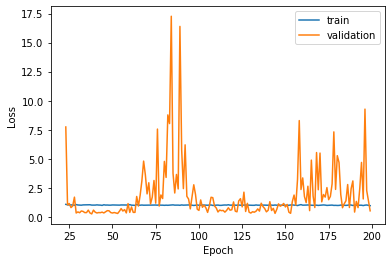

In [222]:
plt.plot(range(23,200),dico["train_loss"][23:],label="train")
plt.plot(range(23,200),dico["val_loss"][23:],label="validation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

#### Prediction absolute errors based on all epochs from the 23th to the 200th epoch

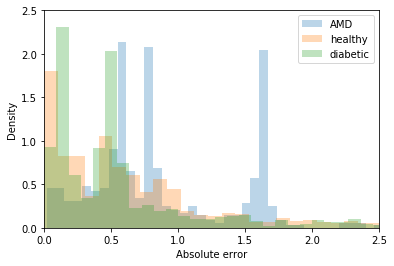

In [198]:
for diag in ["AMD","healthy","diabetic"]:
    plt.hist(list(itertools.chain(*[list(np.abs(error_list[diag][i])) for i in range(23,epochs)])),
             alpha=0.3,density=True,label=diag,bins=100)
plt.axis([0,2.5,0,2.5])
plt.xlabel("Absolute error")
plt.ylabel("Density")
plt.legend()
plt.show()

#### Prediction errors based on all epochs from the 23th to the 200th epoch

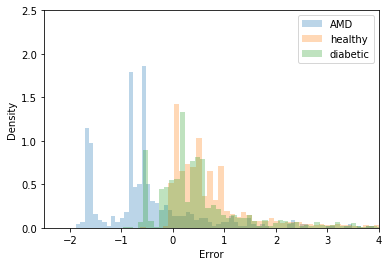

In [232]:
for diag in ["AMD","healthy","diabetic"]:
    plt.hist(list(itertools.chain(*[list(error_list[diag][i]) for i in range(23,epochs)])),
             alpha=0.3,density=True,label=diag,bins=100)
plt.axis([-2.5,4,0,2.5])
plt.xlabel("Error")
plt.ylabel("Density")
plt.legend()
plt.show()

#### Prediction errors based on all tested configurations

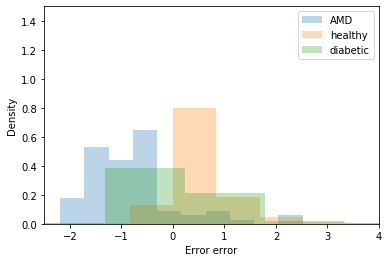

In [231]:
for diag in ["AMD","healthy","diabetic"]:
    plt.hist(list(itertools.chain(*[list(dict_model_selection[diag][i]) for i in range(len(dict_model_selection[diag]))])),
             alpha=0.3,density=True,label=diag)
plt.axis([-2.5,4,0,1.5])
plt.xlabel("Error error")
plt.ylabel("Density")
plt.legend()
plt.show()